In [8]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [117]:
import sys
sys.path.append('../ratinabox_data')
import ratinabox_data_generation
from mpl_toolkits.axes_grid1 import ImageGrid

In [52]:
plt.rcParams["svg.fonttype"] = 'none'

In [82]:
np.random.seed(0)
dt = 50e-3
n = 75
rat = ratinabox_data_generation.Rat(n_cells=3, noise_std=0.1)
full_history = rat.get_n_iid_points(n, dt=dt, warm_up_n=0)

In [83]:
slowest_time_const = max(rat.noise_coherence_time, rat.agent.speed_coherence_time,
                         rat.agent.rotational_velocity_coherence_time)
sampling_dt = int(10 * slowest_time_const / dt)
max_time = 10 * n * slowest_time_const

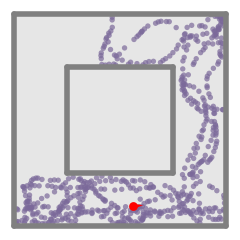

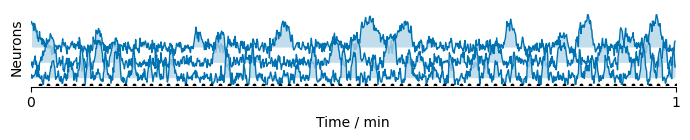

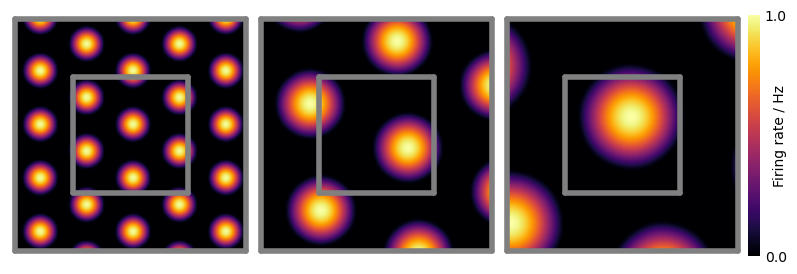

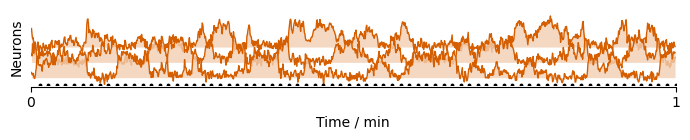

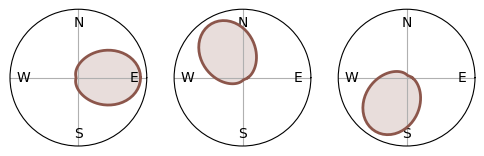

In [154]:
step = sampling_dt * dt
n_steps = 1 + int((max_time - step) / step)
sampled_points = np.linspace(step / 60, n_steps * step / 60, n_steps) 

#########
# fig, ax = plt.subplots(figsize=(3, 3))
fig, ax = rat.agent.plot_trajectory()#fig=fig, ax=ax)
plt.tight_layout()
plt.savefig('figs/rat_trajectory.svg', transparent=True)
plt.show()
#########
fig, ax = plt.subplots(figsize=(7, 1.5))
rat.grid_cells.plot_rate_timeseries(fig=fig, ax=ax, color='#0072B2')
ax.set_xlim(0, 1)
ax.set_xticks([0, 1], [0, 1])
ax.scatter(sampled_points, ax.get_ylim()[0] * np.ones_like(sampled_points), s=3, color='#000000')
plt.tight_layout()
plt.savefig('figs/rat_grid_rate.svg', transparent=True)
plt.show()
#########
fig, ax = rat.grid_cells.plot_rate_map(figsize=(7, 3))
plt.savefig('figs/rat_grid.svg', transparent=True)
plt.show()
#########
fig, ax = plt.subplots(figsize=(7, 1.5))
rat.head_dir_cells.plot_rate_timeseries(fig=fig, ax=ax, color='#D55E00')
ax.set_xlim(0, 1)
ax.set_xticks([0, 1], [0, 1])
ax.scatter(sampled_points, ax.get_ylim()[0] * np.ones_like(sampled_points), s=3, color='#000000')
plt.tight_layout()
plt.savefig('figs/rat_dir_rate.svg', transparent=True)
plt.show()
#########
fig, ax = rat.head_dir_cells.plot_angular_rate_map()
plt.savefig('figs/rat_dir.svg', transparent=True)
plt.show()